# K-NearestNeighbor(K-NN)
It is a supervised machine learning algorithm that can be used to solve both classification and regression problems.It is a non-parametric mean that it does not make any assumption on the underlying data distribution.lazy learning means that it does not require any training data points for model generation.All training data is used in the testing phase .This makes training faster but testing phase slower and costlier.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the dataset

df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# x and y
X = df.drop('species',axis=1)
y = df['species']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# call the model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [14]:
# predict the species for a new set of measurement

new_measurement = np.array([[5.1,3.5,1.1,0.2]])
knn.predict(new_measurement)

c:\Users\786\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [16]:
# load train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [17]:
# fitt the model on data

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,y_train)


KNeighborsClassifier()

In [18]:
# predict the model

y_pred = model.predict(X_test)


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(120.72222222222221, 0.5, 'true')

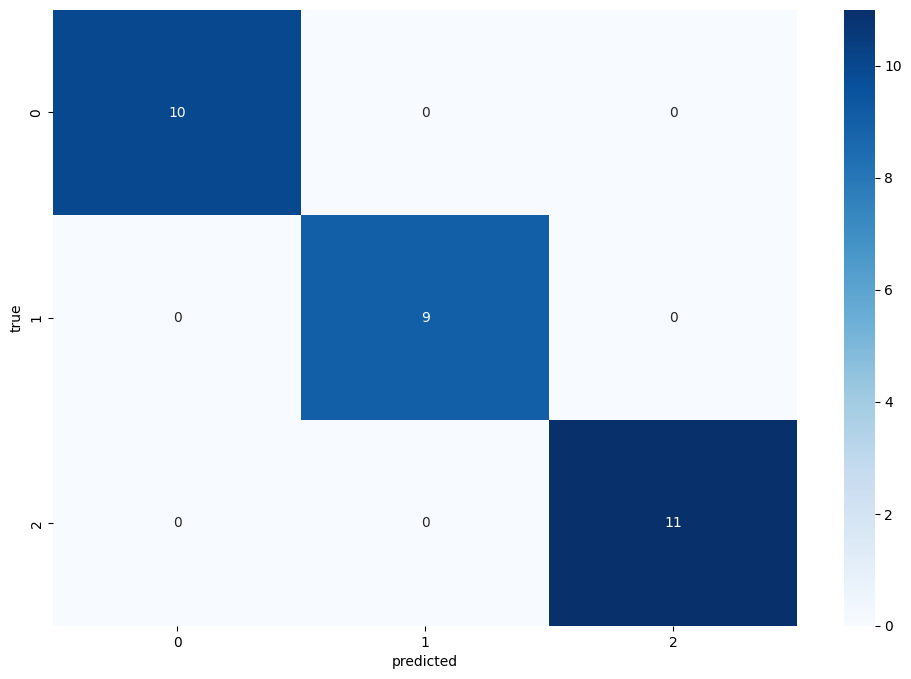

In [19]:
# evaluate the model

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# plot the confusion matrix

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,cmap='Blues')

plt.xlabel('predicted')
plt.ylabel('true')

## Regression with KNN

In [20]:
# regression problem on tips data set  
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
# split data into x and y

X = tips.drop('tip',axis=1)
y = tips['tip']

In [27]:
# encoding the categorical data into numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype =='object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])        

In [28]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# call the model

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5, metric='minkowski',p=2 )

          

In [30]:
# fit the model

model.fit(X_train, y_train)

KNeighborsRegressor()

In [33]:
#predict the model

y_pred = model.predict(X_test)

In [34]:
# evaluate the model

from sklearn.metrics import mean_squared_error, r2_score

print(f'Mean Squared Error:{mean_squared_error(y_test, y_pred)}')
print (f'R2 Score: {r2_score(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean Squared Error:0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [37]:
 # predict a values
 
 model.predict([[20, 1,1,1,1,2]])

c:\Users\786\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.994])

In [42]:
# save the model
import pickle

pickle.dump(model,open('./saved_models/model_knn_regression.pkl','wb'))